# Uber Data Analysis: R Data Science Project

In this R project, we will analyze the [Uber Pickups in New York City](https://drive.google.com/file/d/1emopjfEkTt59jJoBH9L9bSdmlDC4AR87/view) dataset. 

Data storytelling is an important component of Machine Learning which helps companies understand the background of various operations. With the help of visualization, companies can benefit by understanding complex data and gaining insights that would help them to craft decisions. We will implement `ggplot2` on the Uber Pickups dataset and at the end, master the art of  data visualization in R.

## 1. Importing the Essential Packages

In [1]:
# Import necessary packages used in this Uber Data Analysis Project
library(tidyverse)
library(ggthemes)
library(scales)
library(DT)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




## 2. Creating vector of colors to be implemented in our plots

In [2]:
# Vector of colors
colors = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")
colors

[1] "#CC1011" "#665555" "#05a399" "#cfcaca" "#f5e840" "#0683c9" "#e075b0"

## 3. Reading the Data into their designated variables
Now, we will read several csv files that contain the data from April 2014 to September 2014. We will store these in corresponding data frames like apr_data, may_data, etc. After we have read the files, we will combine all of this data into a single dataframe called ‘data_2014’.

Then, in the next step, we will perform the appropriate formatting of Date.Time column. Then, we will proceed to create factors of time objects like day, month, year etc.

In [3]:
# Read raw csv files for months Apr to Sep 2014
apr_data <- read.csv("uber-raw-data-apr14.csv")
may_data <- read.csv("uber-raw-data-may14.csv")
jun_data <- read.csv("uber-raw-data-jun14.csv")
jul_data <- read.csv("uber-raw-data-jul14.csv")
aug_data <- read.csv("uber-raw-data-aug14.csv")
sep_data <- read.csv("uber-raw-data-sep14.csv")

# Combine into a single dataframe
data_raw <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)
head(data_raw)

,Date.Time,Lat,Lon,Base
,<chr>,<dbl>,<dbl>,<chr>
1,4/1/2014 0:11:00,40.7690,-73.9549,B02512
2,4/1/2014 0:17:00,40.7267,-74.0345,B02512
3,4/1/2014 0:21:00,40.7316,-73.9873,B02512
4,4/1/2014 0:28:00,40.7588,-73.9776,B02512
5,4/1/2014 0:33:00,40.7594,-73.9722,B02512
6,4/1/2014 0:33:00,40.7383,-74.0403,B02512


## 4. Data Wrangling

The dataframe `data_2014` contains the columns **Date.Time** and **Base**, classifed as character, as well as the **Latitude** and **Longitude** columns classified as double.  

In the next step, we will perform data wrangling to convert the Data.Time column into its appropriate formatting.

Then, we will proceed to create factors of time objects like day, month, year, etc.

In [4]:
data_2014 <- data_raw %>%
    mutate(
        Date.Time = mdy_hms(Date.Time),  # change Date.Time column to dttm format
        Day = factor(day(Date.Time)),  # create individual columns for month, day, year
        Month = factor(month(Date.Time, label = TRUE)),
        Year = factor(year(Date.Time)),
        Day_of_Week = factor(wday(Date.Time, label = TRUE)),
        Hour = factor(hour(Date.Time)),  # add time variable columns as well
        Minutes = factor(minute(Date.Time)),
        Seconds = factor(second(Date.Time))
    )

head(data_2014)

,Date.Time,Lat,Lon,Base,Day,Month,Year,Day_of_Week,Hour,Minutes,Seconds
,<dttm>,<dbl>,<dbl>,<chr>,<fct>,<ord>,<fct>,<ord>,<fct>,<fct>,<fct>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Apr,2014,Tue,0,11,0
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Apr,2014,Tue,0,17,0
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Apr,2014,Tue,0,21,0
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Apr,2014,Tue,0,28,0
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Apr,2014,Tue,0,33,0
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,1,Apr,2014,Tue,0,33,0


## 5. Data Visualization
In the next step, we will use the `ggplot` function to plot the number of trips that the passengers have made in a day. We will also use `dplyr` to aggregate our data. In the resulting visualizations, we can understand how the number of passengers fares throughout the day.

### **Plotting the Trips by the Hours in a day**

In [5]:
# Aggregate data by hour
hour_data <- data_2014 %>%
    group_by(Hour) %>%
    summarize(Trips = n())

head(hour_data)

Hour,Trips
<fct>,<int>
0,103836
1,67227
2,45865
3,48287
4,55230
5,83939


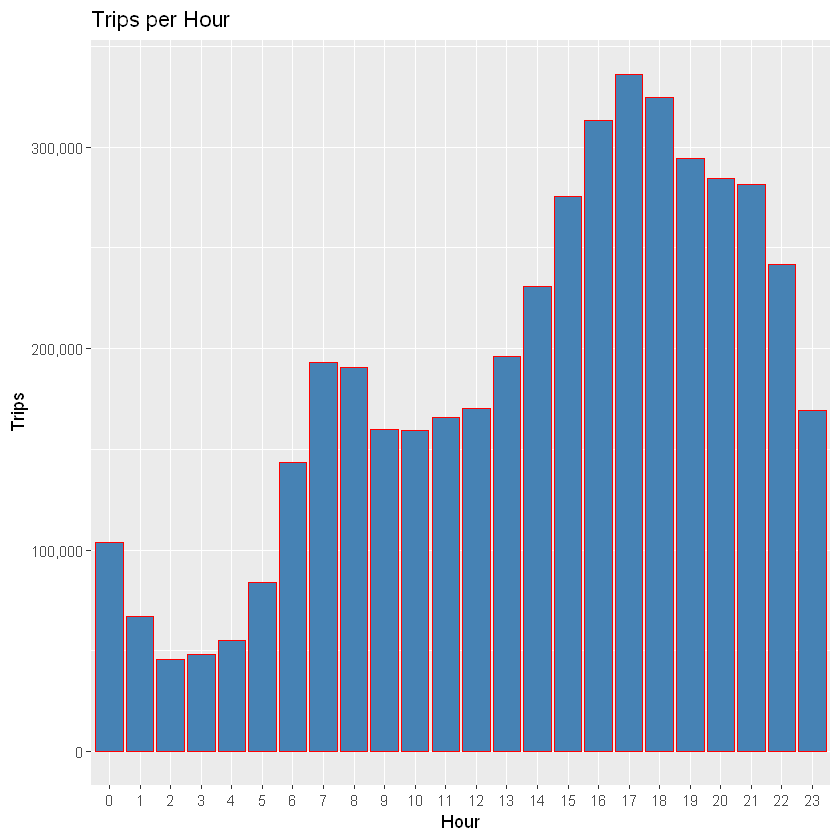

In [6]:
# Plot Trips per Hour graph
ggplot(hour_data, aes(x = Hour, y = Trips)) +
geom_bar(stat = "identity", fill = "steelblue", color = "red") +
labs(title = "Trips per Hour") +
scale_y_continuous(labels = comma)

Based on the plotted *Trips per Hour* graph, we observe that the number of trips are higher in the evening around 5:00 and 6:00 PM.

### **Plotting the Trips by Hour and Month**

In [7]:
# Aggregrate data by month and hour
month_hour_data <- data_2014 %>%
    group_by(Month, Hour) %>%
    summarize(Trips = n())

head(month_hour_data)

`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.


Month,Hour,Trips
<ord>,<fct>,<int>
Apr,0,11910
Apr,1,7769
Apr,2,4935
Apr,3,5040
Apr,4,6095
Apr,5,9476


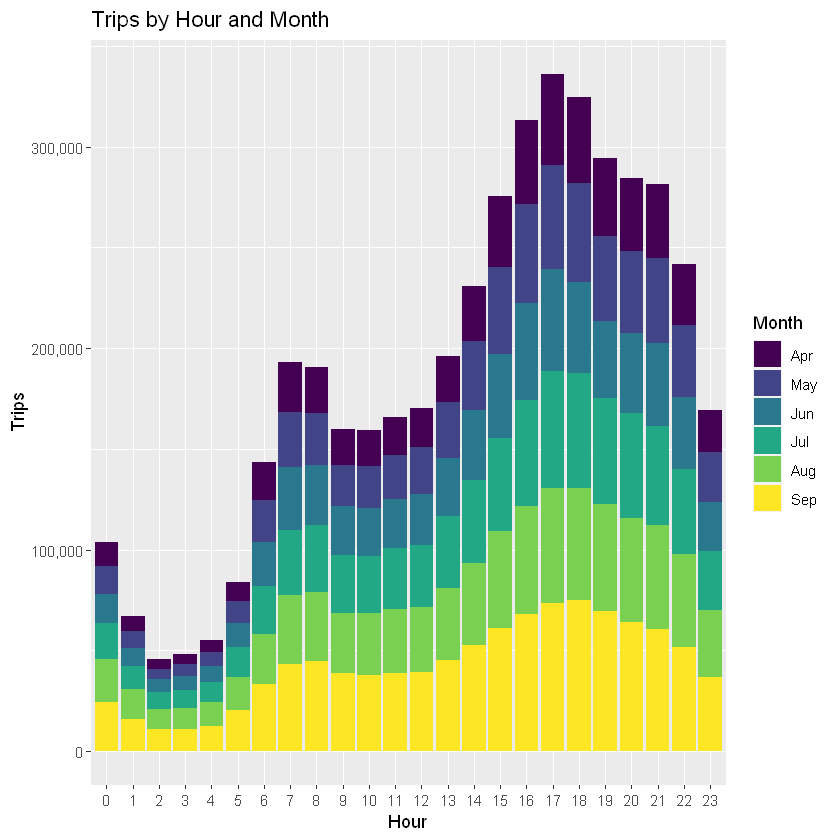

In [8]:
# Plot Trips by Hour and Month graph
ggplot(month_hour_data, aes(x = Hour, y = Trips, fill = Month)) +
geom_bar(stat = "identity") +
labs(title = "Trips by Hour and Month") +
scale_y_continuous(labels = comma)

### **Plotting the Trips during Every Day of the Month**

Next, we will plot our data based on every day of the month.

In [9]:
# Aggregate data by day of the month
day_data <- data_2014 %>%
    group_by(Day, Month) %>%
    summarize(Trips = n())

head(day_data)

`summarise()` has grouped output by 'Day'. You can override using the `.groups`
argument.


Day,Month,Trips
<fct>,<ord>,<int>
1,Apr,14546
1,May,23375
1,Jun,15967
1,Jul,21228
1,Aug,32353
1,Sep,19961


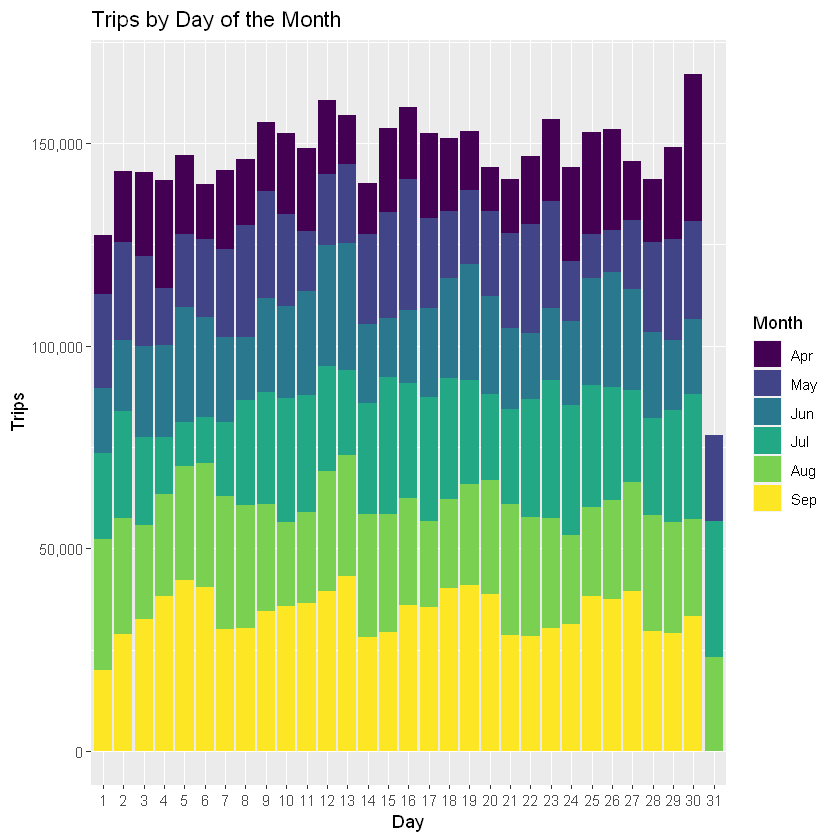

In [10]:
# Plot Trips by Day of the Month graph
ggplot(day_data, aes(x = Day, y = Trips, fill = Month)) +
geom_bar(stat = "identity") +
labs(title = "Trips by Day of the Month") +
scale_y_continuous(labels = comma)

Based on the *Trips by Day of the Month* graph, we observe that 30th of the month has the highest trips in year 2014 which is mostly contributed by the month of April.

### **Plotting the Number of Trips per Month**

In this section, we will visualize the number of trips that are taking place each month of the year.

In [11]:
# Aggregate data by Month
month_data <- data_2014 %>%
    group_by(Month) %>%
    summarize(Total= n())

head(month_data)

Month,Total
<ord>,<int>
Apr,564516
May,652435
Jun,663844
Jul,796121
Aug,829275
Sep,1028136


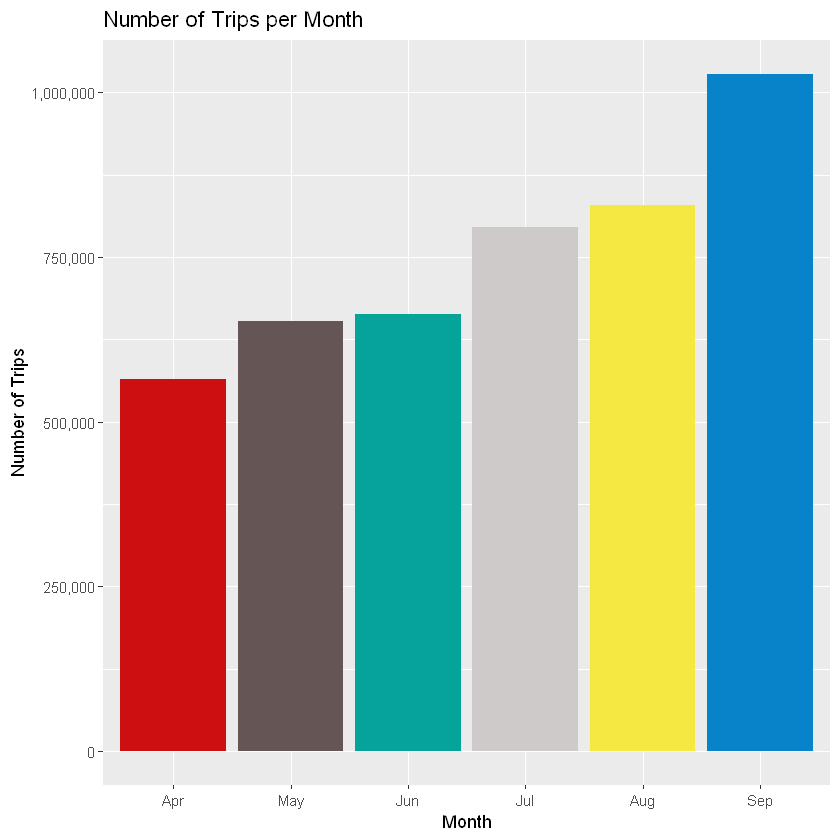

In [12]:
# Plot the Number of Trips per Month
ggplot(month_data, aes(x = Month, y = Total, fill = Month)) +
geom_bar(stat = "identity") +
labs(title = "Number of Trips per Month", y = "Number of Trips") +
scale_fill_manual(values = colors) +
scale_y_continuous(labels = comma) +
theme(legend.position = "none")

### **Plotting the Trips by Day of the Week per Month**

In [13]:
# Aggregate data by Day of Week and Month
weekday_month_data <- data_2014 %>%
    group_by(Day_of_Week, Month) %>%
    summarize(Trips = n())

head(weekday_month_data)

`summarise()` has grouped output by 'Day_of_Week'. You can override using the
`.groups` argument.


Day_of_Week,Month,Trips
<ord>,<ord>,<int>
Sun,Apr,51251
Sun,May,56168
Sun,Jun,79656
Sun,Jul,76327
Sun,Aug,110246
Sun,Sep,116532


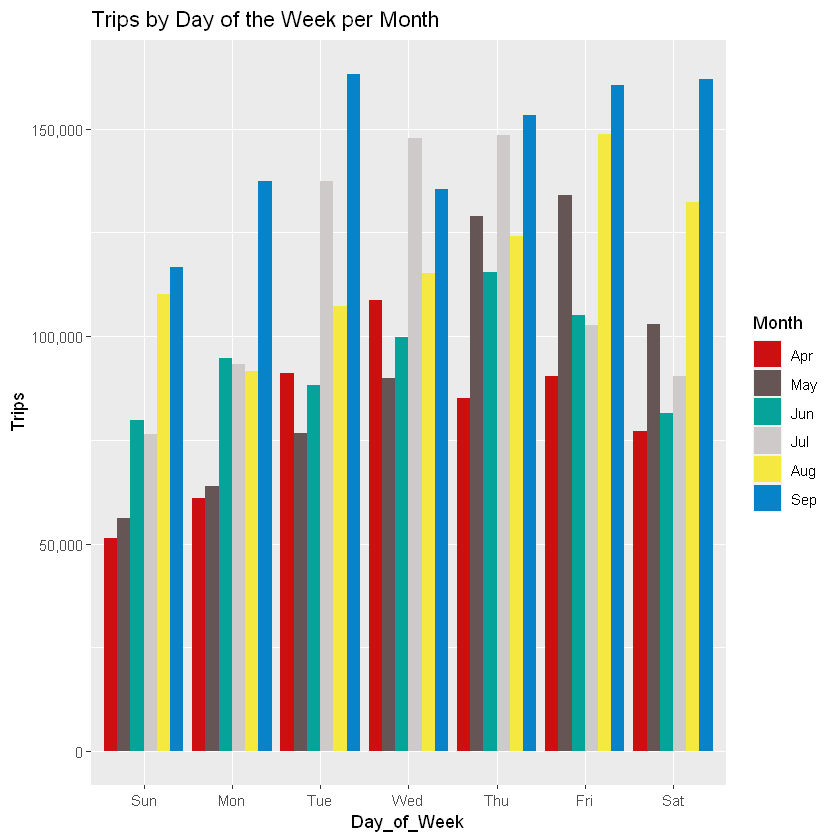

In [14]:
# Plotting the Trips by Day of the Week per Month
ggplot(weekday_month_data, aes(x = Day_of_Week, y = Trips, fill = Month)) +
geom_bar(stat = "identity", position = "dodge") +
labs(title = "Trips by Day of the Week per Month") +
scale_y_continuous(labels = comma) +
scale_fill_manual(values = colors)

In the output visualizations above, we observe that most trips were made during the month of September. Furthermore, we also obtain visual reports of the number of trips that were made on every day of the week, with consistently fewer trips made on Sundays.

### **Plotting the Number of Trips by Bases**

In the following visualizations, we plot the number of trips that have been taken by the passengers from each of the five bases. Out of which, we observe that B02617 recorded the highest number of trips. Furthermore, base B02617 has the highest number of trips in the month. Thursdays also observed highest trips in the three bases – B02598, B02617, B02682.

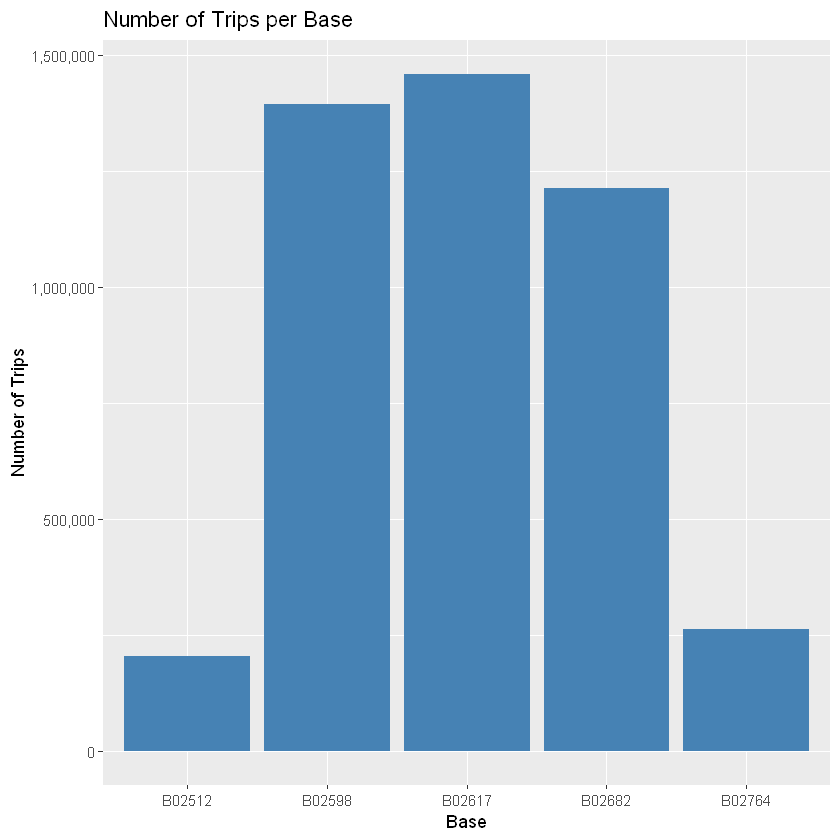

In [15]:
# Plot the Number of Trips per Base graph
ggplot(data_2014, aes(x = Base)) +
geom_bar(fill = "steelblue") +
scale_y_continuous(labels = comma) +
labs(title = "Number of Trips per Base",
     y = "Number of Trips")

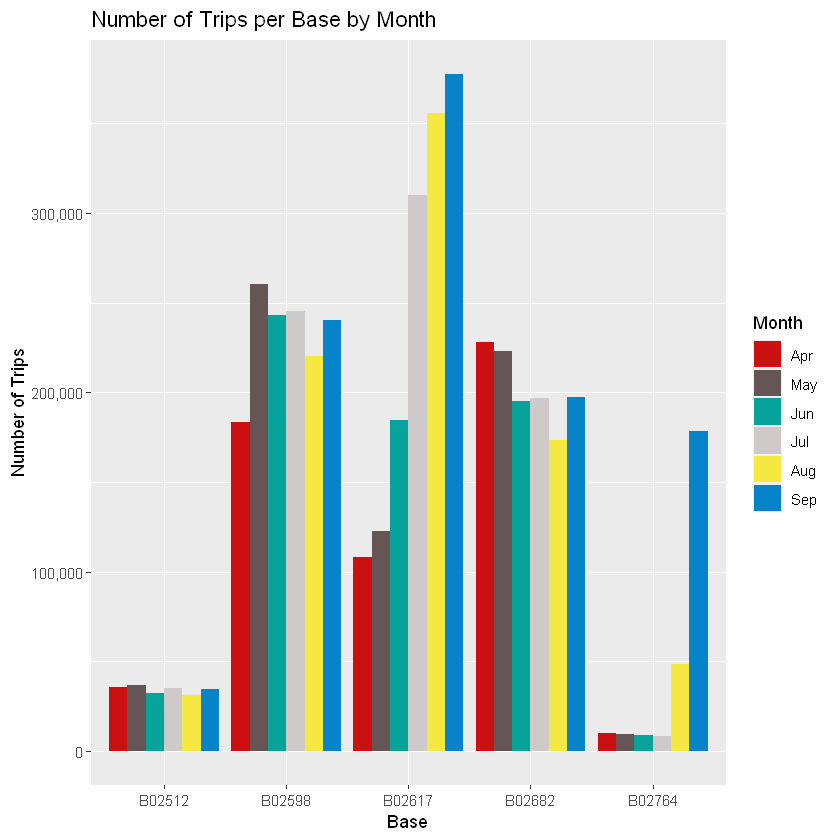

In [16]:
# Plot the Number of Trips per Base by Month
ggplot(data_2014, aes(x = Base, fill = Month)) +
geom_bar(position = "dodge") +
scale_fill_manual(values = colors) +
scale_y_continuous(labels = comma) +
labs(title = "Number of Trips per Base by Month",
     y = "Number of Trips")

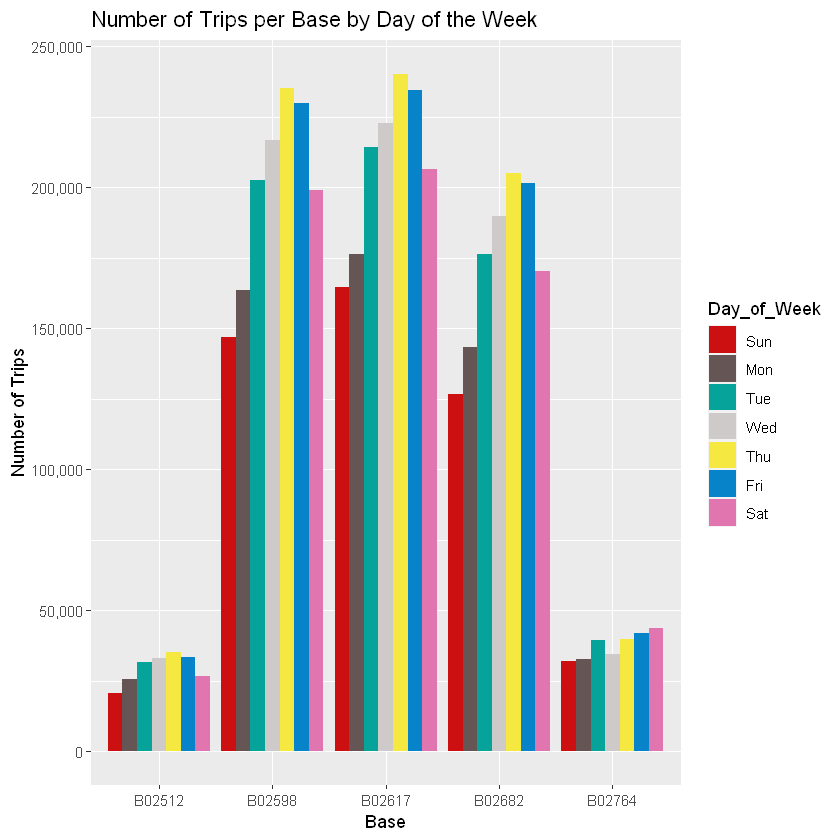

In [17]:
# Plot the Number of Trips per Base by Day of the Week
ggplot(data_2014, aes(x = Base, fill = Day_of_Week)) +
geom_bar(position = "dodge") +
scale_y_continuous(labels = comma) +
scale_fill_manual(values = colors) +
labs(title = "Number of Trips per Base by Day of the Week",
     y = "Number of Trips")

### **Creating a Heatmap Visualization of Day, Hour and Month**

We will plot five heatmap plots --

1. Heatmap by Hour and Day
2. Heatmap by Month and Day
3. Heatmap by Month and Day of the Week
4. Heatmap that delineates Month and Bases
5. Heatmap by Bases and Day of the Week

`summarise()` has grouped output by 'Day'. You can override using the `.groups`
argument.


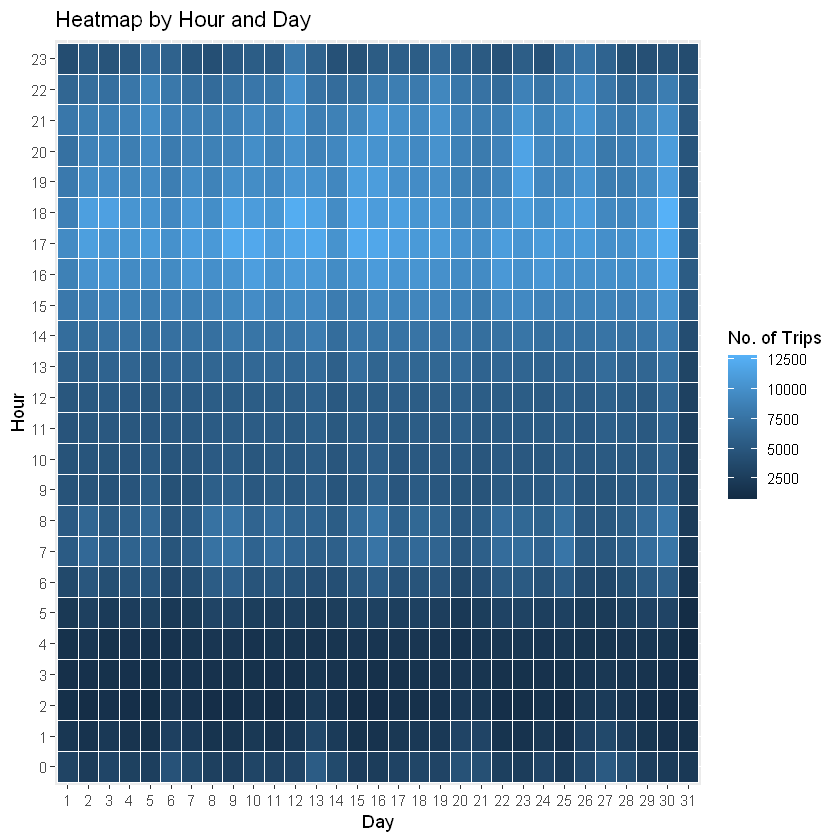

In [18]:
# 1. Heatmap by Hour and Day
hour_and_day <- data_2014 %>%
    group_by(Day, Hour) %>%
    summarize(Trips = n())

ggplot(hour_and_day, aes(x = Day, y = Hour, fill = Trips)) +
geom_tile(color = "white") +
labs(title = "Heatmap by Hour and Day",
     fill = "No. of Trips")

`summarise()` has grouped output by 'Day'. You can override using the `.groups`
argument.


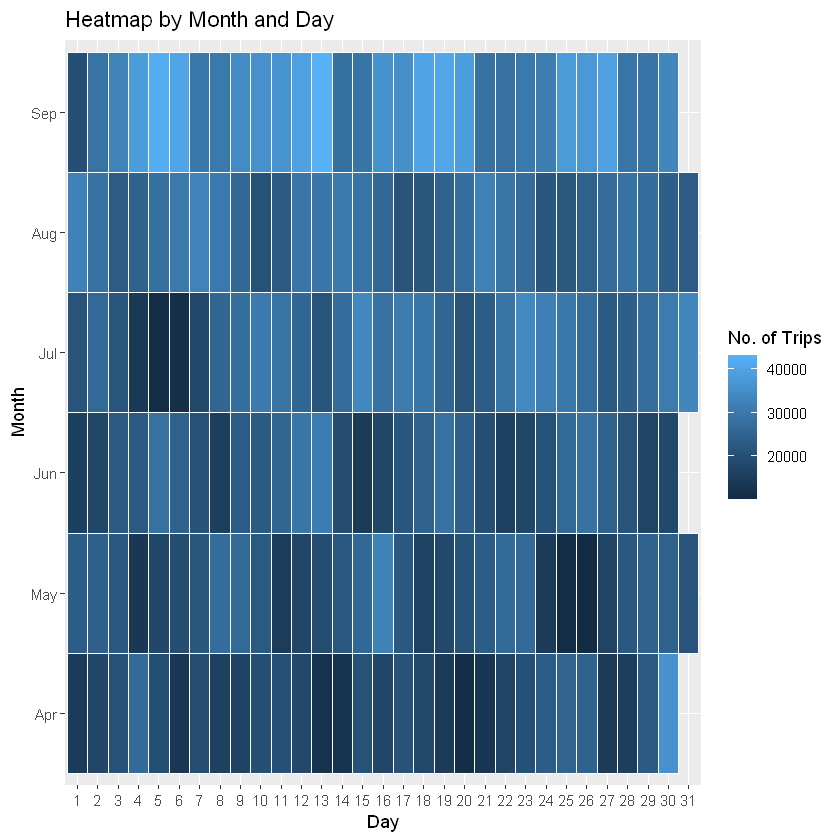

In [19]:
# 2. Heatmap by Month and Day
month_and_day <- data_2014 %>%
    group_by(Day, Month) %>%
    summarize(Trips = n())

ggplot(month_and_day, aes(x = Day, y = Month, fill = Trips)) +
geom_tile(color = "white") +
labs(title = "Heatmap by Month and Day",
     fill = "No. of Trips")

`summarise()` has grouped output by 'Day_of_Week'. You can override using the
`.groups` argument.


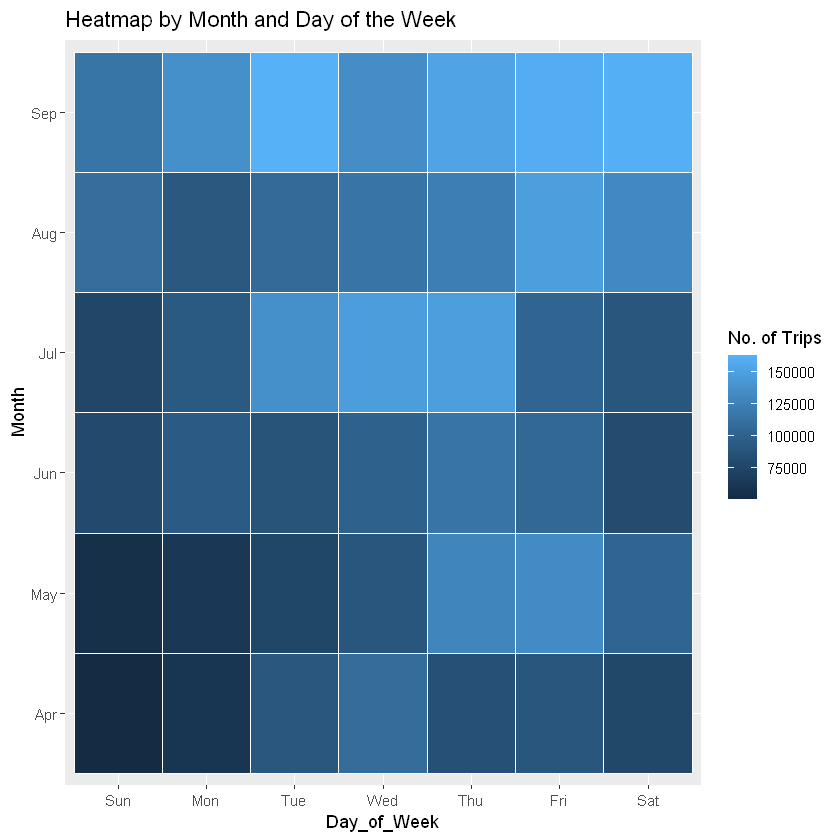

In [20]:
# 3. Heatmap by Month and Day of the Week
month_and_weekday <- data_2014 %>%
    group_by(Day_of_Week, Month) %>%
    summarize(Trips = n())

ggplot(month_and_weekday, aes(x = Day_of_Week, y = Month, fill = Trips)) +
geom_tile(color = "white") +
labs(title = "Heatmap by Month and Day of the Week",
     fill = "No. of Trips")

`summarise()` has grouped output by 'Base'. You can override using the
`.groups` argument.


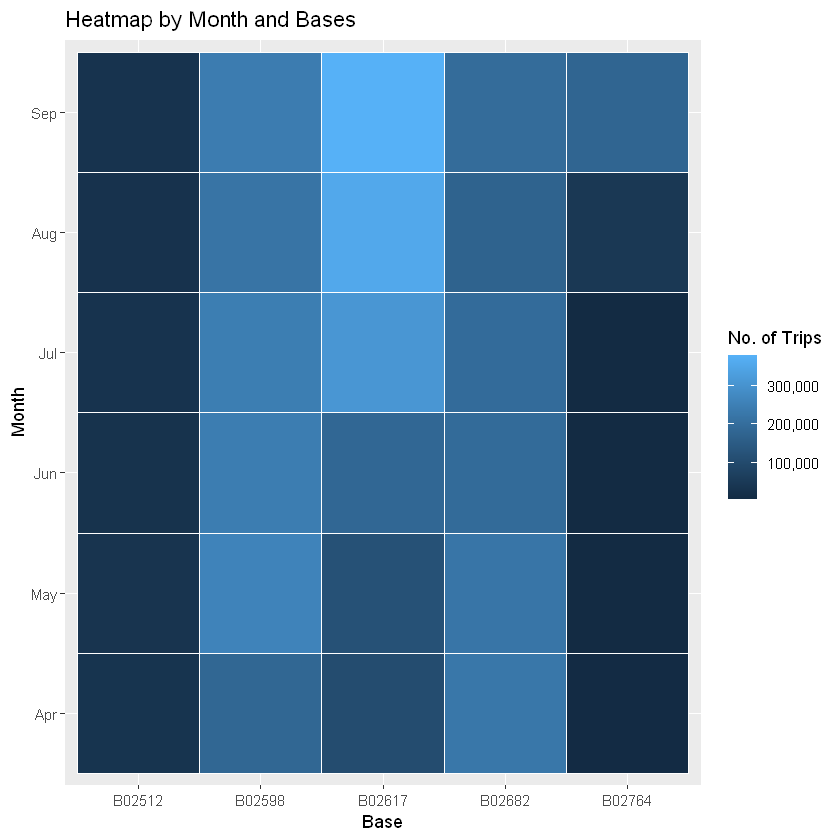

In [21]:
# 4. Heatmap that delineates Month and Bases
month_base <- data_2014 %>%
    group_by(Base, Month) %>%
    summarize(Trips = n())

ggplot(month_base, aes(x = Base, y = Month, fill = Trips)) +
geom_tile(color = "white") +
labs(title = "Heatmap by Month and Bases",
     fill = "No. of Trips") +
scale_fill_gradient(labels = comma)

`summarise()` has grouped output by 'Base'. You can override using the
`.groups` argument.


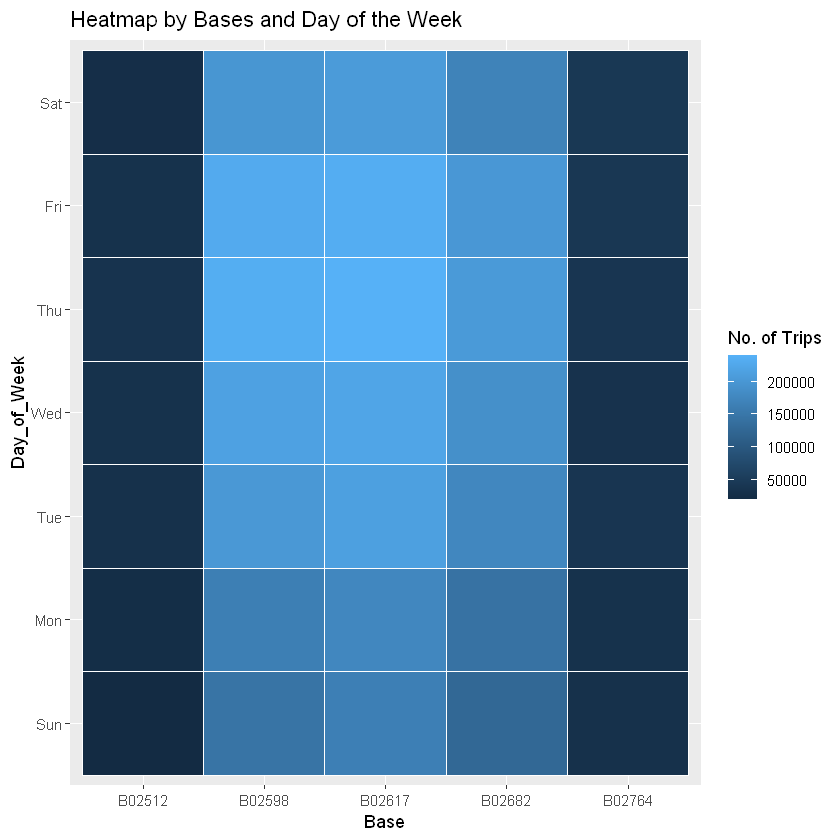

In [22]:
# 5. Heatmap by Bases and Day of the Week
weekday_base <- data_2014 %>%
    group_by(Base, Day_of_Week) %>%
    summarize(Trips = n())

ggplot(weekday_base, aes(x = Base, y = Day_of_Week, fill = Trips)) +
geom_tile(color = "white") +
labs(title = "Heatmap by Bases and Day of the Week",
     fill = "No. of Trips")

### Creating a map visualization of rides in New York

In the final section, we will visualize the rides in New York city by creating a geo-plot that will help us to visualize the rides during 2014 (Apr – Sep) and by the bases in the same period.

In [23]:
# Load required packages
library(gganimate)
library(gifski)

> **Step 1: The Base Map**
>
> The first step before we can plot our data on to a map is to create a data frame that contains the base map. The `maps` package provides data about the boundaries of many different regions. The `map_data()` function from this package is used to access this data and return a data frame that can be plotted with `ggplot2`. In the following, we assign the variable `which_state` the name of the state we want to plot, **New York** in this case. The use of the keyword `county` in the call to `map_data()` specifies that we want county-level boundaries for the indicated region.

In [24]:
which_state <- "new york"
county_info <- map_data("county", region = which_state)

head(county_info)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-73.78550,42.46763,1,1,new york,albany
2,-74.25533,42.41034,1,2,new york,albany
3,-74.25533,42.41034,1,3,new york,albany
4,-74.27252,42.41607,1,4,new york,albany
5,-74.24960,42.46763,1,5,new york,albany
6,-74.22668,42.50774,1,6,new york,albany


The above `county_info` dataset describes the shape of each county in New York by specifying the latitude and longitude of the corners of polygons that approximate the shapes. The group column indicates the county to which the corresponding set of polygon corners belongs. For example, group 1 corresponds to Albany county, group 2 is Allegany, and so on. The order column specifies the order in which the points should be connected to correctly draw each polygon. Finally, the region identifies the state and the subregion identifies the county.

With this data, we can use `ggplot` to plot an outline of the state that also contains the outlines of the counties, as follows:

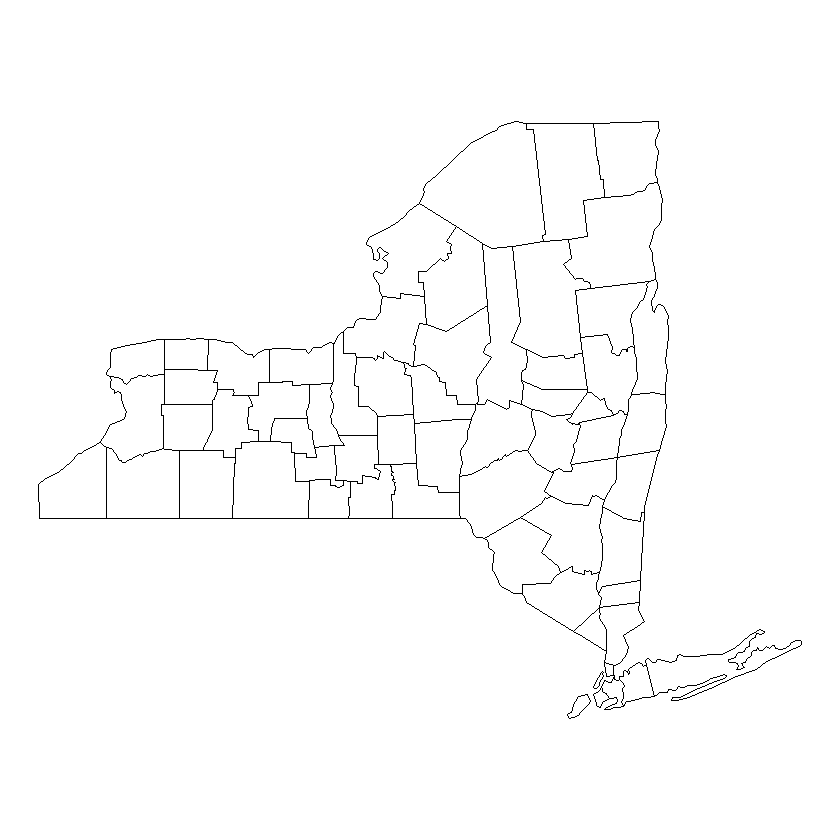

In [25]:
base_map <- ggplot(county_info, aes(x = long, y = lat, group = group)) +
geom_polygon(color = "black", fill = "white") +
coord_quickmap() +
theme_void()

base_map

> **Step 2: Adding Data to the Base Map**
>
> Now that we have the base map, we can add our `data_2014` dataset to the map using `geom_point()`, as shown below. This function adds another layer to the base map by plotting each of the data points from our dataset as a scatter-plot using `Lon` and `Lat` as the x and y coordinates, respectively. The data points are grouped using `Month`. The importance of this grouping will become apparent later when we animate the map.

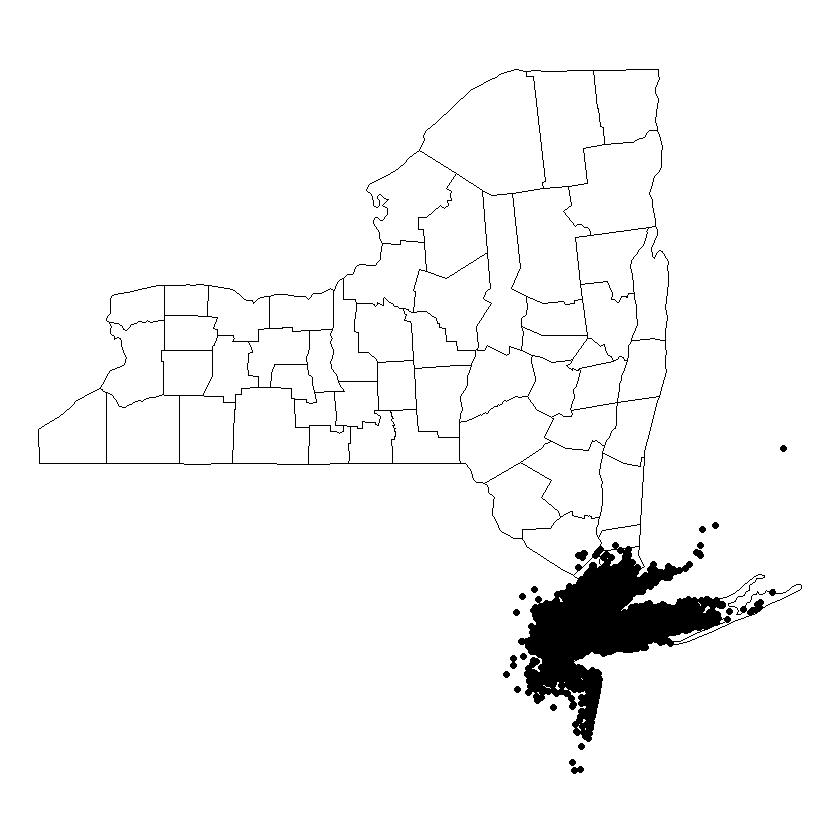

In [29]:
map_with_data <- base_map +
geom_point(data = data_2014, aes(x = Lon, y = Lat, group = Month))

map_with_data

We can see that all of our data points are tightly clustered in this map. In fact, they are too tightly clustered to see the individual values. Furthermore, there are large areas of the map shown that really are not interesting with this dataset. To zoom in on the portion of the map we want to focus on, we find the range of positions of the data points using the minimum and maximum of the latitude and longitude values. We use `coord_quickmap()` to set the x and y limits on the map as follows:

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


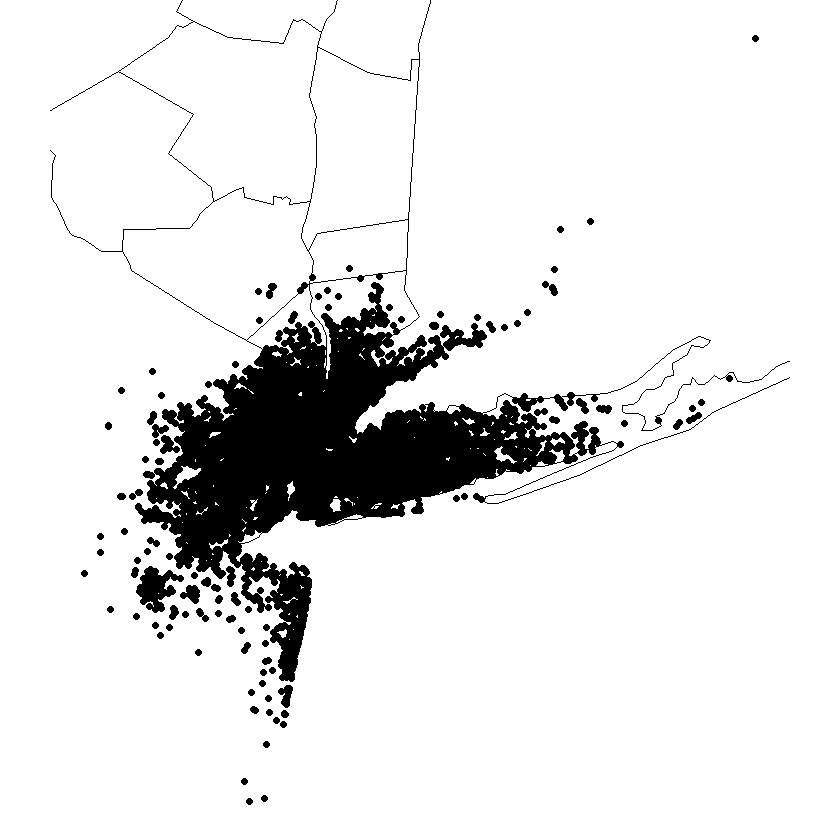

In [30]:
# Set x and y limits on the map
min_long <- min(data_2014$Lon)
max_long <- max(data_2014$Lon)
min_lat <- min(data_2014$Lat)
max_lat <- max(data_2014$Lat)

map_with_data_zoom <- map_with_data +
  coord_quickmap(xlim = c(min_long, max_long),  ylim = c(min_lat, max_lat))

map_with_data_zoom

Notice that when we execute this code the system produces the warning message: *Coordinate system already present. Adding new coordinate system, which will replace the existing one.* This message occurs because we called the function `coord_quickmap()` a second time. The warning can be safely ignored.

> **Step 3: Using Color to Highlight Another Data Dimension**
>
> By assigning `Month` to the `color` parameter in `geom_point()`, `ggplot` automatically varies the color for each dot based on the `Base`, as shown below:

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


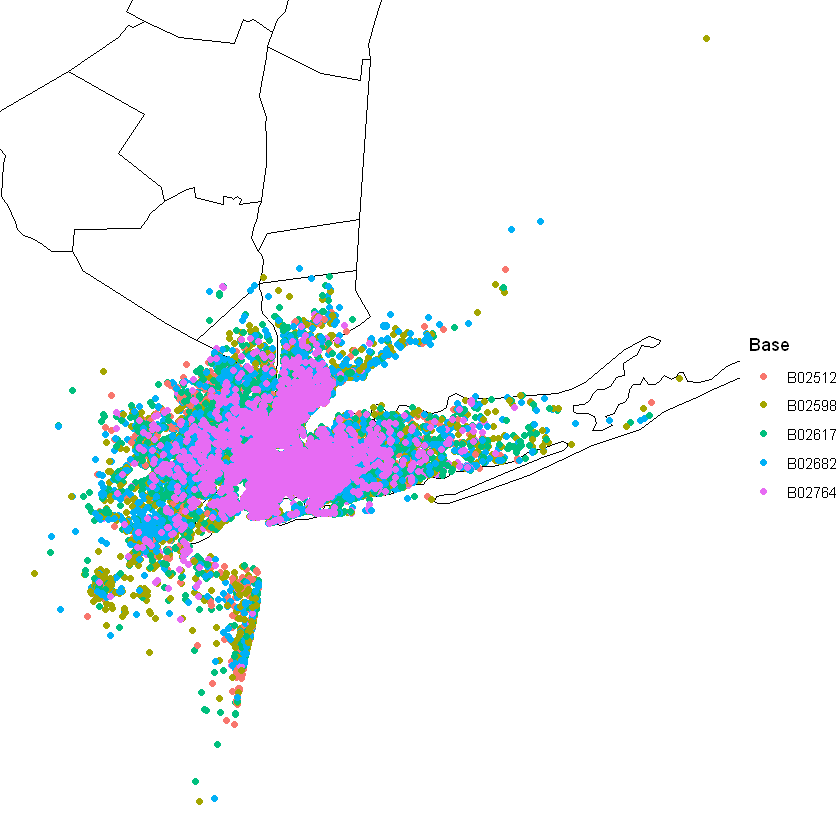

In [31]:
map_final <- base_map +
geom_point(data = data_2014, aes(x = Lon, y = Lat, group = Month, color = Base)) +
coord_quickmap(xlim = c(min_long, max_long),  ylim = c(min_lat, max_lat))

map_final

> **Step 4: Animating the Map**
>
> Animation is a powerful visualization technique to show how the data changes over time. We can add animation to the map we have produced so far using `ggplot` and `gganimate`.
>
> In the following code, we show how to add more layers to the `map_final` object we created above to make the dots appear sequentially as determined by the `Month` column in the `data_2014` data frame. The function `transition_states(Month)` specifies that we want to use `Month` to move from one frame of the animation to the next. To add a title to the map, we use `ggtitle` where the `closest_state` parameter is the name of the state closest to this frame, which in this case is `Month`; `frame` is the sequence number of the current frame; and `nframes` is the total number of frames in the animation. We compute the total number of Months to display, and thus the total number of frames to generate, by finding the range of Months in the data set. Finally, the function `animate()` renders the frames to display one-at-a-time.

In [37]:
map_with_animation <- map_final +
    transition_states(Month) +
    ggtitle("Month: {closest_state}",
            subtitle = "Frame {frame} of {nframes}")

num_months <- nlevels(data_2014$Month)
animate(map_with_animation, nframes = num_months, fps = 2)

In [38]:
# Save the Map to a File
anim_save("map.gif")

<img src="map.gif" width = "600" align="center">

## 6. Conclusion

We made use of packages like `ggplot2` and `gganimate` which allowed us to plot various types of visualizations pertaining to several time frames of the year. With this, we could conclude how time affected customer trips. Finally, we made a geoplot of New York that provided us with the details of how various users made trips from different bases. 


-------------------------------------------------------------------------------------------

*References*

*https://data-flair.training/blogs/r-data-science-project-uber-data-analysis/*

*https://conservancy.umn.edu/server/api/core/bitstreams/ba6ea265-c865-48d2-bcf4-e287542efd9a/content#:~:text=Now%20that%20we%20have%20a,x%20and%20y%20coordinates%2C%20respectively*